<a href="https://colab.research.google.com/github/Dhruv-Desai711/Projects/blob/main/Text_Data_Analysis_on_Youtube_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
comments=pd.read_csv('GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\n'


In [11]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0.0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0.0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0.0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0.0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0.0


In [12]:
from textblob import TextBlob

In [17]:
TextBlob('Its more accurate to call it the M+ (1000) be...').sentiment.polarity

0.45000000000000007

In [18]:
comments.isna().sum()

video_id         0
comment_text    10
likes            0
replies          1
dtype: int64

In [19]:
comments.shape

(178147, 4)

In [20]:
comments.dropna(inplace=True)

In [21]:
comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [22]:
comments.shape

(178136, 4)

As we can see 11 values are removed 

In [23]:
polarity=[]
for i in comments['comment_text']:
  polarity.append(TextBlob(i).sentiment.polarity)


In [24]:
comments['Polarity']=polarity

In [25]:
comments.head()

,video_id,comment_text,likes,replies,Polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0.0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0.0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0.0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0.0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0.0,1.00


Now let us filter out the positive comments having polarity 1

In [28]:
comments_positive=comments[comments['Polarity']==1]

In [29]:
comments_positive.head()

,video_id,comment_text,likes,replies,Polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0.0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2.0,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1.0,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0.0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0.0,1.0


In [30]:
from wordcloud import WordCloud,STOPWORDS

In [35]:
stopwords=set(STOPWORDS)

In [33]:
total_comments=" ".join(comments_positive['comment_text'])

In [36]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

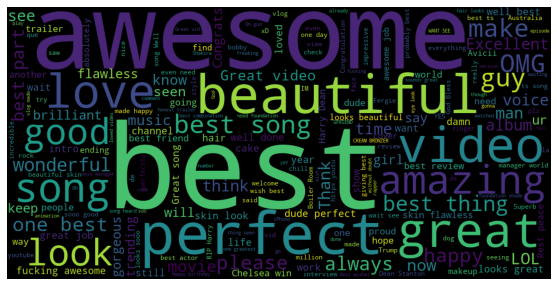

In [37]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

As we can observe awsome,beautiful,best are some of the positive words that come very often

**Let us do the same thing for the negative words as well**

---



In [38]:
comments_negative=comments[comments['Polarity']==-1]

In [39]:
total_comments=" ".join(comments_negative['comment_text'])

In [40]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

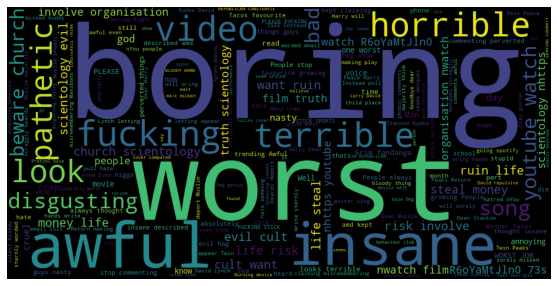

In [41]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

As we can observe the negative words such as boring,worst,awful,insane occurs very often